In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
df = pd.read_csv(r"C:\Users\deepu\Downloads\archive (1) (2).zip")
df_original = df.copy()


In [2]:
df.head()
df.info()
df.shape
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


np.int64(0)

In [25]:

print("===== Missing Values Before Preprocessing =====")
missing_before = df_original.isnull().sum()
print(missing_before)

total_missing = df_original.isnull().sum().sum()
print("\nTotal missing values in dataset before preprocessing:", total_missing)


===== Missing Values Before Preprocessing =====
Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

Total missing values in dataset before preprocessing: 274


In [3]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()


Resume_ID                 0
Name                      0
Skills                    0
Experience (Years)        0
Education                 0
Certifications            0
Job Role                  0
Recruiter Decision        0
Salary Expectation ($)    0
Projects Count            0
AI Score (0-100)          0
dtype: int64

In [4]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df = cap_outliers(df, col)

print("Shape after handling outliers:", df.shape)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    capped = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {capped}")


Shape after handling outliers: (1000, 11)
Resume_ID: 0
Experience (Years): 0
Salary Expectation ($): 0
Projects Count: 0
AI Score (0-100): 0


In [43]:

for col in numeric_cols:
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_original[(df_original[col] < lower) | (df_original[col] > upper)]
    print(f"{col} → Outliers before preprocessing: {len(outliers)}")


Experience (Years) → Outliers before preprocessing: 0
Salary Expectation ($) → Outliers before preprocessing: 0
Projects Count → Outliers before preprocessing: 0
AI Score (0-100) → Outliers before preprocessing: 6


In [24]:

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers after preprocessing: {len(outliers)}")


Experience (Years) → Outliers after preprocessing: 0
Salary Expectation ($) → Outliers after preprocessing: 0
Projects Count → Outliers after preprocessing: 0
AI Score (0-100) → Outliers after preprocessing: 0


In [5]:
df['Job Role Name'] = df_original['Job Role']
df['Education Name'] = df_original['Education']
df['Certifications Name'] = df_original['Certifications']


In [11]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col not in ['Job Role Name', 'Education Name', 'Certifications Name']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [26]:

print("Job Role BEFORE encoding:")
print(df_original['Job Role'].value_counts())

print("\nJob Role AFTER encoding:")
print(df['Job Role'].value_counts())


Job Role BEFORE encoding:
Job Role
AI Researcher            257
Data Scientist           255
Cybersecurity Analyst    255
Software Engineer        233
Name: count, dtype: int64

Job Role AFTER encoding:
Job Role
0    255
1    255
2    254
3    230
Name: count, dtype: int64


In [7]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [30]:

numeric_cols = ['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']

print("===== Numeric Features Before Scaling =====")
print(df[numeric_cols].head())


===== Numeric Features Before Scaling =====
   Experience (Years)  Salary Expectation ($)  Projects Count  \
0                  10                  104895               8   
1                  10                  113002               1   
2                   1                   71766               7   
3                   7                   46848               0   
4                   4                   87441               9   

   AI Score (0-100)  
0               100  
1               100  
2                70  
3                95  
4               100  


In [31]:
print("\n===== Numeric Features After Scaling =====")
print(df_scaled[numeric_cols].head())



===== Numeric Features After Scaling =====
   Experience (Years)  Salary Expectation ($)  Projects Count  \
0            1.638015                1.077883        0.882116   
1            1.638015                1.429451       -1.294395   
2           -1.266580               -0.358788        0.571186   
3            0.669816               -1.439382       -1.605326   
4           -0.298382                0.320973        1.193046   

   AI Score (0-100)  
0          0.767199  
1          0.767199  
2         -0.703101  
3          0.522149  
4          0.767199  


In [9]:
X = df.drop('Job Role', axis=1)
y = df['Job Role']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from sklearn.model_selection import train_test_split

X = df_original.drop('Job Role', axis=1)  
y = df_original['Job Role']               

X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("===== Before Preprocessing =====")
print("X_train shape:", X_train_before.shape)
print("X_test shape:", X_test_before.shape)
print("y_train value counts:\n", y_train_before.value_counts())
print("y_test value counts:\n", y_test_before.value_counts())


===== Before Preprocessing =====
X_train shape: (700, 10)
X_test shape: (300, 10)
y_train value counts:
 Job Role
Data Scientist           189
AI Researcher            185
Cybersecurity Analyst    173
Software Engineer        153
Name: count, dtype: int64
y_test value counts:
 Job Role
Cybersecurity Analyst    82
Software Engineer        80
AI Researcher            72
Data Scientist           66
Name: count, dtype: int64


In [35]:

X = df.drop('Job Role', axis=1)  
y = df['Job Role']              

# Split into train and test (70% train, 30% test)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("\n===== After Preprocessing =====")
print("X_train shape:", X_train_after.shape)
print("X_test shape:", X_test_after.shape)
print("y_train value counts:\n", y_train_after.value_counts())
print("y_test value counts:\n", y_test_after.value_counts())



===== After Preprocessing =====
X_train shape: (695, 10)
X_test shape: (299, 10)
y_train value counts:
 Job Role
1    184
0    180
2    171
3    160
Name: count, dtype: int64
y_test value counts:
 Job Role
2    83
0    75
1    71
3    70
Name: count, dtype: int64


C:\Users\deepu\AppData\Local\Temp\ipykernel_12080\347173819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Job Role Name', data=df, palette='tab10')


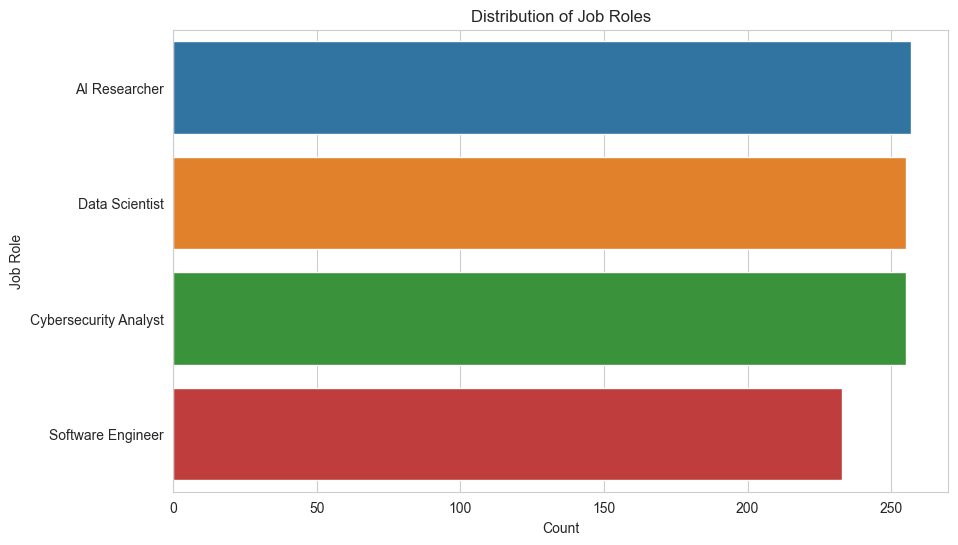

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(y='Job Role Name', data=df, palette='tab10')
plt.title('Distribution of Job Roles')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()


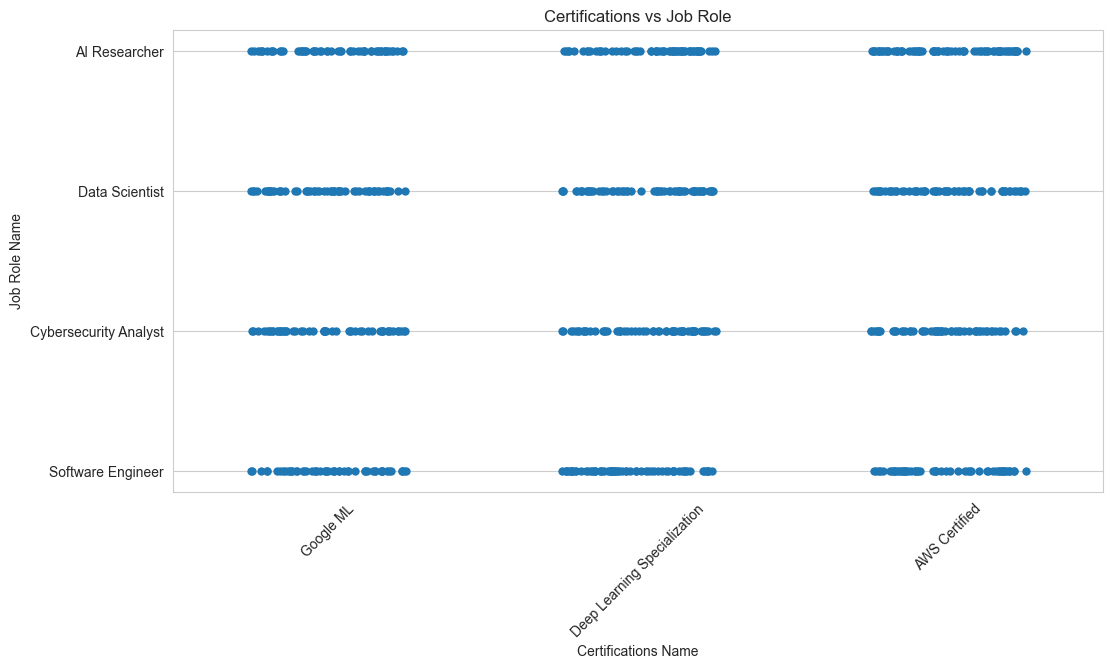

In [15]:
plt.figure(figsize=(12,6))
sns.stripplot(x='Certifications Name', y='Job Role Name', data=df, jitter=0.25, size=6)
plt.title('Certifications vs Job Role')
plt.xticks(rotation=45)
plt.show()


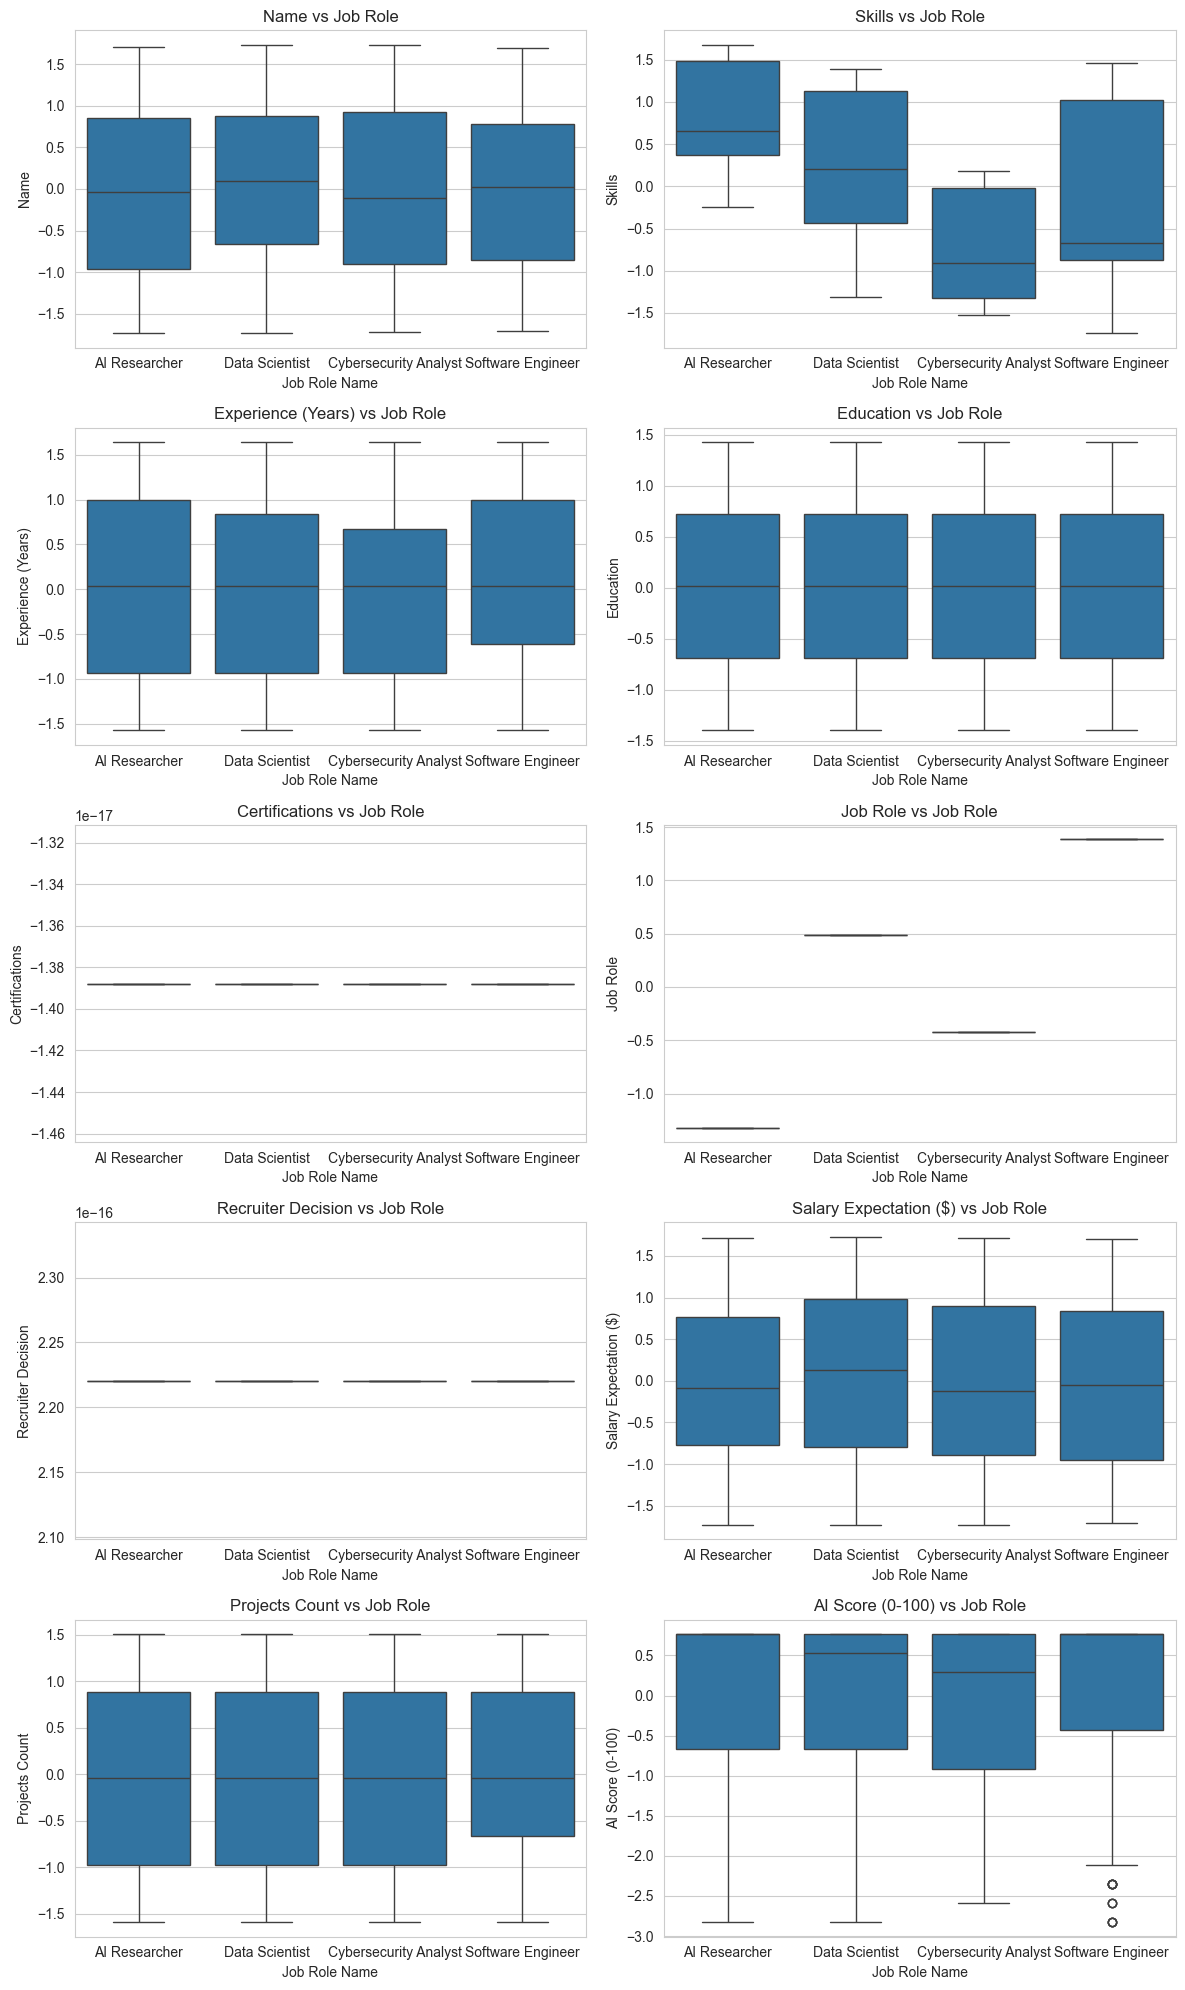

In [17]:
numeric_cols_no_id = numeric_cols.drop('Resume_ID')
rows = (len(numeric_cols_no_id)+1)//2
plt.figure(figsize=(12, 4*rows))
for i, col in enumerate(numeric_cols_no_id, 1):
    plt.subplot(rows,2,i)
    sns.boxplot(x='Job Role Name', y=col, data=df)
    plt.title(f'{col} vs Job Role')
plt.tight_layout()
plt.show()


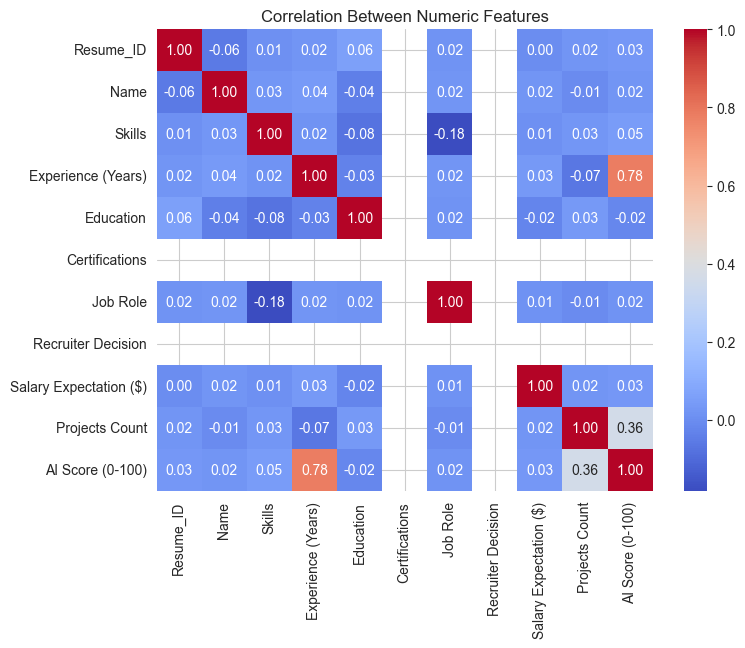

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.show()


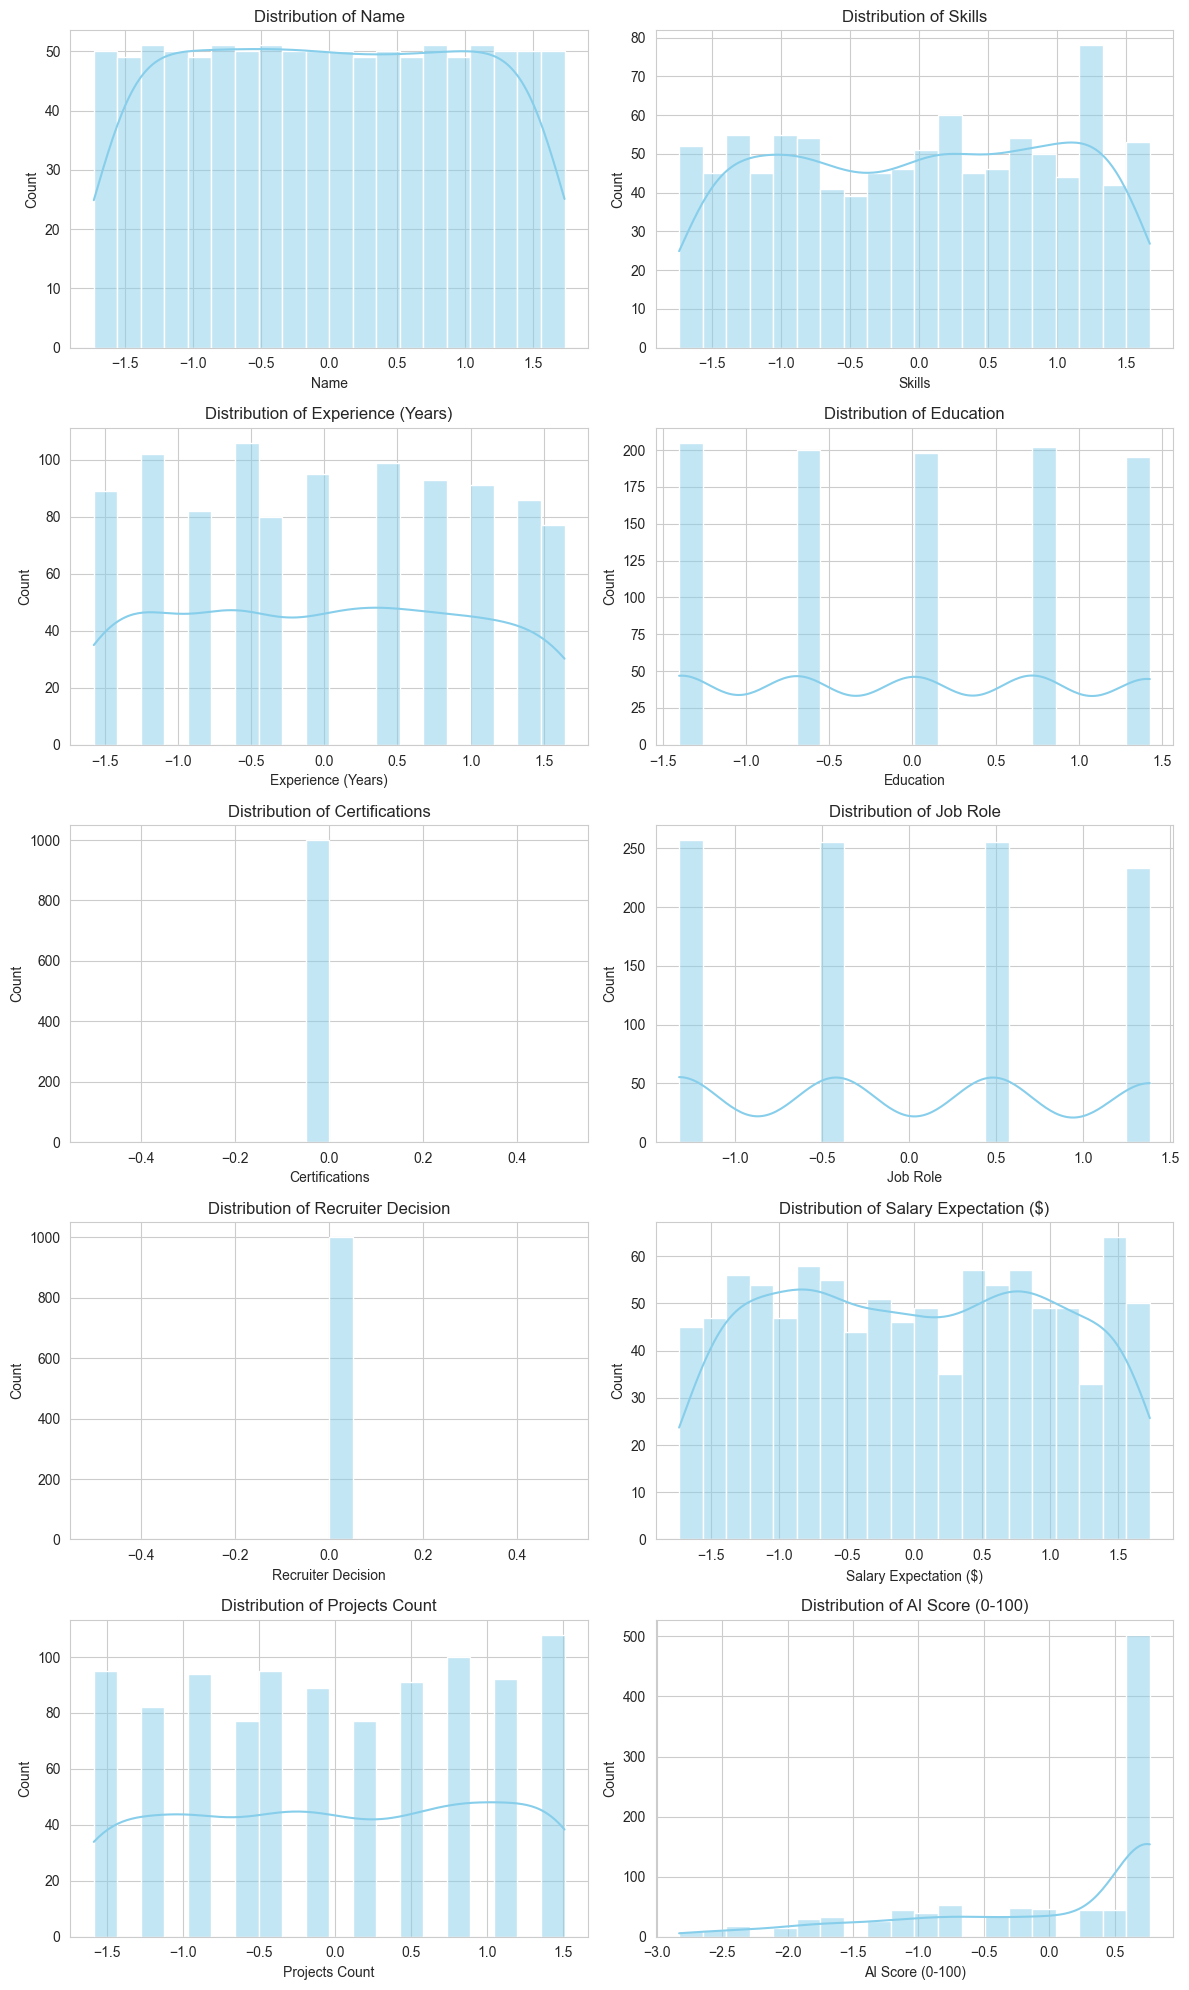

In [20]:
plt.figure(figsize=(12,4*rows))
for i, col in enumerate(numeric_cols_no_id,1):
    plt.subplot(rows,2,i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [42]:
# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')

# =========================
# LOAD DATASET
# =========================
df = df = pd.read_csv(r"C:\Users\deepu\OneDrive\Desktop\Infosys Internship\archive (1).zip")
df_original = df.copy()  # Keep a copy for "before preprocessing"

# =========================
# DISPLAY BEFORE PREPROCESSING
# =========================
print("===== BEFORE PREPROCESSING =====")
print("First 5 rows:\n", df_original.head())
print("\nMissing Values Before Preprocessing:\n", df_original.isnull().sum())

# Job Role counts before encoding
print("\nJob Role BEFORE encoding:\n", df_original['Job Role'].value_counts())

# =========================
# PREPROCESSING
# =========================

# 1️⃣ Handle missing values in Certifications
df['Certifications'] = df['Certifications'].fillna('None')

# 2️⃣ Encode categorical variables
le_job = LabelEncoder()
df['Job Role'] = le_job.fit_transform(df['Job Role'])

le_recruiter = LabelEncoder()
df['Recruiter Decision'] = le_recruiter.fit_transform(df['Recruiter Decision'])

# 3️⃣ Feature scaling for numeric columns
numeric_cols = ['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 4️⃣ Remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# 5️⃣ Train-Test split
X = df.drop('Job Role', axis=1)
y = df['Job Role']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# =========================
# DISPLAY AFTER PREPROCESSING
# =========================
print("\n===== AFTER PREPROCESSING =====")
print("First 5 rows:\n", df.head())
print("\nMissing Values After Preprocessing:\n", df.isnull().sum())

print("\nJob Role AFTER encoding:\n", df['Job Role'].value_counts())

print("\nNumeric Features After Scaling (first 5 rows):\n", df[numeric_cols].head())

# Outlier check after preprocessing
for col in numeric_cols:
    outliers = df[(df[col] < df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25))) | 
                  (df[col] > df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25)))]
    print(f"{col} → Outliers after preprocessing: {len(outliers)}")

print("\nTrain-Test Split Completed Successfully")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts())
print("y_test value counts:\n", y_test.value_counts())

print("\n===== PREPROCESSING COMPLETED SUCCESSFULLY =====")


===== BEFORE PREPROCESSING =====
First 5 rows:
    Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   

   Experience (Years) Education                Certifications  \
0                  10      B.Sc                           NaN   
1                  10       MBA                     Google ML   
2                   1       MBA  Deep Learning Specialization   
3                   7    B.Tech                 AWS Certified   
4                   4       PhD                           NaN   

                Job Role Recruiter Decision  Salary Expectation ($)  \
0        

In [44]:

df_original.to_csv(r"C:\Users\deepu\Downloads\AI_Resume_Screening_Before_Preprocessing.csv", index=False)


In [45]:

df.to_csv(r"C:\Users\deepu\Downloads\AI_Resume_Screening_After_Preprocessing.csv", index=False)
